# Prep

In [1]:
#import
import pandas as pd
import numpy as np
from Levenshtein import distance
import matplotlib.pyplot as plt
import fastwer

In [2]:
#directory
output_dir_ = '/home/dw16/models/inferences/' # this is just the words

# ** reread from one of those file --> redo the inference 

In [3]:
#loading in data
byt5 = pd.read_csv(output_dir_ + "s1000_small_words.csv")
yelpfeast = pd.read_csv(output_dir_ + "s1000_yelpfeast.csv")
multilex = pd.read_csv(output_dir_ + "s1000multilex.csv")

In [4]:
byt5.iloc[725]
table = {
    "Sentence 725": [byt5["sentences target"][725], byt5["sentences source"][725], byt5["predicted_text"][725]]

}
bad = pd.DataFrame(table, index = ["Sentence Target",'sentences source', 'predicted_text'])
pd.options.display.max_colwidth = 300
bad

,Sentence 725
Sentence Target,"More precisely, $g^{1/3}T$ is constant, where $g$ is the number of helicity states of massless particles (with fermions counted as $\fr{7}{8}$ )."
sentences source,. lere ↳∖↓∪↓⋅∢⋅↓≻↓⋅∢⋅≼∙↓≱∖⋖⋅⇂∙∖⇁⋡∙↙∣⋟↙↓≱∖≼∙∪⊔⊳∖↿⋜⋯↿⊳∖∖⋎↓↕⋖⋅↓⋅∢⊾∙↙∣↓⊳∖↿↓↕⋖⋅⊔⊔⊔↓∣⋊⋅↓⋅∪. helicity states of massless particles (with fermions countec as £).
predicted_text,Here $\xi_{\rm p} = \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm p} + \xi_{\rm ...


## CER & WER

In [5]:
#CER&WER calculation 
def calc_cer_wer(df_byt5_words, input_text_col = "sentences source", 
                target_text_col="sentences target", predicted_text_col='predicted_text'):
    # input_text = OCR source in
    # target_text = ground truth 
    # predicted_text = predicted OCR text
    cer_before = []; cer_after = []
    wer_before = []; wer_after = []
    for i in range(len(df_byt5_words)):
        d = df_byt5_words.iloc[i]
        # before
        if not pd.isnull(d[input_text_col]) and not pd.isnull(d[target_text_col]) and not pd.isnull(d[predicted_text_col]):
            # also, for ints/floats that got read in
            input_text = str(d[input_text_col])
            target_text = str(d[target_text_col])
            predicted_text = str(d[predicted_text_col])
            cbefore = fastwer.score_sent(input_text,
                                         target_text,
                                         char_level=True)
            wbefore = fastwer.score_sent(input_text,
                                         target_text,
                                         char_level=False)
            # after
            cafter = fastwer.score_sent(predicted_text,
                                         target_text,
                                         char_level=True)
            wafter = fastwer.score_sent(predicted_text,
                                         target_text,
                                         char_level=False)
        else:
            cbefore = np.nan
            wbefore = np.nan
            cafter = np.nan
            wafter = np.nan

        cer_before.append(cbefore)
        wer_before.append(wbefore)
        cer_after.append(cafter)
        wer_after.append(wafter)

    df_byt5_words['CER Before'] = cer_before
    df_byt5_words['WER Before'] = wer_before
    df_byt5_words['CER After'] = cer_after
    df_byt5_words['WER After'] = wer_after
    return df_byt5_words

In [6]:
df_byt5_words = calc_cer_wer(byt5.copy())

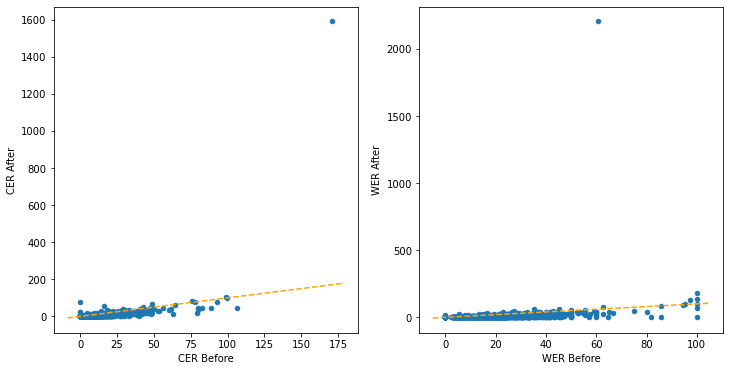

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
df_byt5_words.plot(x = 'CER Before', y = 'CER After', kind='scatter',ax=ax[0])
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

df_byt5_words.plot(x = 'WER Before', y = 'WER After', kind='scatter',ax=ax[1])
xlim = ax[1].get_xlim()
ylim = ax[1].get_ylim()
ax[1].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

plt.show()

<AxesSubplot:>

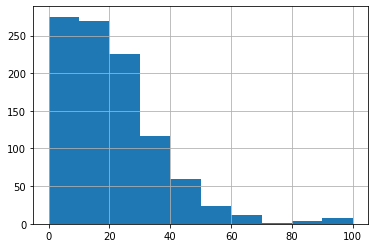

In [16]:
#average WER/CER
table = {
    "CER": [df_byt5_words["CER Before"].mean(), df_byt5_words["CER After"].mean(), df_byt5_words["CER Before"].std(),df_byt5_words["CER After"].std()], 
    "WER": [df_byt5_words["WER Before"].mean(), df_byt5_words["WER After"].mean(), df_byt5_words["WER Before"].std(),df_byt5_words["WER After"].std()], 

}
bad = pd.DataFrame(table, index = ["Average Before",'Average After"', 'SD Before', 'SD After'])
pd.options.display.max_colwidth = 300
bad

,CER,WER
Average Before,12.105763,20.131445
"Average After""",7.390229,10.047249
SD Before,14.810859,16.343772
SD After,51.437224,71.156338


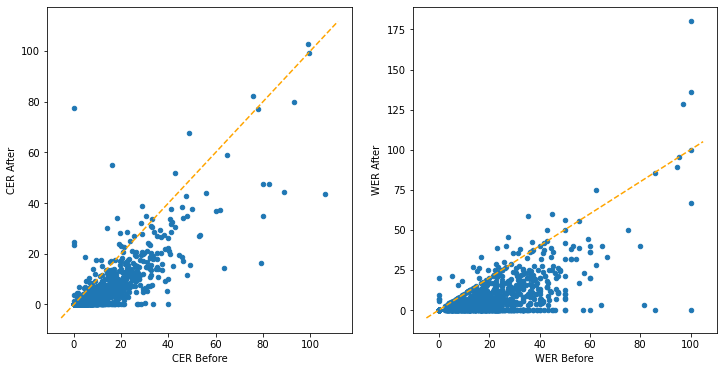

In [10]:
zoom = df_byt5_words[df_byt5_words['CER After'] < 1000]
fig, ax = plt.subplots(1,2,figsize=(12,6))
zoom.plot(x = 'CER Before', y = 'CER After', kind='scatter',ax=ax[0])
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

zoom.plot(x = 'WER Before', y = 'WER After', kind='scatter',ax=ax[1])
xlim = ax[1].get_xlim()
ylim = ax[1].get_ylim()
ax[1].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

plt.show()

### Hallucination
- Those that $${CER}_{after} > {CER}_{before}$$ or $${WER}_{after} > {WER}_{before}$$ i.e. the errors increases

In [7]:
# ER AFter > ER Before function
def compare_ER(df, q1, q2, character):
    df[character] = None
    for i in range(df.shape[0]):
        if df.iloc[i][q2] > df.iloc[i][q1]:
            df.loc[i, character] = 1
        else:
            df.loc[i, character] = 0
    out = df[df[character] == 1]
    return out
     

In [8]:
C_more = compare_ER(df_byt5_words, "CER Before", "CER After", "C")
C_more.shape

(47, 14)

In [9]:
W_more = compare_ER(df_byt5_words, "WER Before", "WER After", "C")
W_more.shape

(34, 14)

#### Hallucinations commonalities

In [10]:
cmore_out = C_more[['sentences source', 'sentences target', 'predicted_text', 'CER Before', "CER After"]]
wmore_out = W_more[['sentences source', 'sentences target', 'predicted_text', 'WER Before', "WER After"]]

In [11]:
## CER
#1. Changing the already correct
cmore_out[(cmore_out['CER Before'] == 0) & (cmore_out['CER After'] > 0)]

,sentences source,sentences target,predicted_text,CER Before,CER After
122,Figure 11 shows that there are two stellar ma...,Figure 11 shows that there are two stellar ma...,Figure \ref{fig:mmetallicity} shows that ther...,0.0,23.4043
132,An example of this is shown in Figure 3 for t...,An example of this is shown in Figure 3 for t...,An example of this is shown in Figure \ref{fi...,0.0,24.5902
284,The shape of the R=2.40 peak changes in the s...,The shape of the R=2.40 peak changes in the s...,The shape of the $R=2.40$ peak changes in the...,0.0,3.7037
399,There is also some evidence that the secondar...,There is also some evidence that the secondar...,There is also some evidence that the secondar...,0.0,1.2048
988,4 spectrum is noisy).,4 spectrum is noisy).,\ref{fig:spectra} spectrum is noisy).,0.0,77.2727


In [12]:
#2. Hallucinations
cmore_out[(cmore_out['CER After']  - cmore_out['CER Before']> 100)]

,sentences source,sentences target,predicted_text,CER Before,CER After
725,. lere ↳∖↓∪↓⋅∢⋅↓≻↓⋅∢⋅≼∙↓≱∖⋖⋅⇂∙∖⇁⋡∙↙∣⋟↙↓≱∖≼∙∪⊔...,"More precisely, $g^{1/3}T$ is constant, where...",Here $\xi_{\rm p} = \xi_{\rm p} + \xi_{\rm p}...,170.5479,1589.726


In [13]:
#3. diff < 10 
three = cmore_out[((cmore_out['CER After'] - cmore_out['CER Before']) <= 10) & (cmore_out['CER Before'] != 0)]
three.head()

,sentences source,sentences target,predicted_text,CER Before,CER After
2,Compared to a smooth polynomial. the flat fie...,"Compared to a smooth polynomial, the flat fie...","Compared to a smooth polynomial, the flat fie...",2.8436,3.3175
76,More details on the analysis method can be fo...,More details on the analysis method can be fo...,More details on the analysis method can be fo...,19.4030,28.3582
103,.,"Possible explanations for this imbalance, dup...",The spectral state of the star is a static en...,99.0566,102.8302
133,However. the data given in Table 5 clearly sh...,"However, the data given in Table 5 clearly sh...","However, the data given in Table \ref{tab:res...",4.7619,6.7227
138,We also take fxj and gxp to be constant. alth...,We also take $\fnl$ and $\gnl$ to be constant...,We also take $f_{\rm NL}$ and $g_{\rm NL}$ to...,23.7569,24.8619


In [14]:
#4. diff < 50
four = cmore_out[((cmore_out['CER After'] - cmore_out['CER Before']) > 10) & (cmore_out['CER Before'] != 0)]
four

,sentences source,sentences target,predicted_text,CER Before,CER After
140,Substituting ourestimated temperature of ?. ὁ...,Substituting ourestimated temperature of \cit...,Substituting ourestimated temperature of \cit...,48.8372,67.4419
176,The results are oesented in Figure S plotted ...,The results are presented in Figure 8 plotted...,The results are presented in Figure \ref{fig:...,4.6875,18.7500
241,Also indicated in Figro Lave,Also indicated in Figure 4 are,Also indicated in Figure \ref{fig:spectra} are,16.1290,54.8387
449,In this case the lower limit increases from a...,In this case the lower limit increases from $...,In this case the lower limit increases from $...,13.9785,30.1075
710,"Both subliminal and superluminal waves (6,ο a...",Both subluminal and superluminal waves $v_{\p...,Both subluminal and superluminal waves $\thet...,18.1818,33.9394
725,. lere ↳∖↓∪↓⋅∢⋅↓≻↓⋅∢⋅≼∙↓≱∖⋖⋅⇂∙∖⇁⋡∙↙∣⋟↙↓≱∖≼∙∪⊔...,"More precisely, $g^{1/3}T$ is constant, where...",Here $\xi_{\rm p} = \xi_{\rm p} + \xi_{\rm p}...,170.5479,1589.7260


In [15]:
#WER 
#1. Changing the already correct
wmore_out[(wmore_out['WER Before'] == 0) & (wmore_out['WER After'] > 0)]

,sentences source,sentences target,predicted_text,WER Before,WER After
122,Figure 11 shows that there are two stellar ma...,Figure 11 shows that there are two stellar ma...,Figure \ref{fig:mmetallicity} shows that ther...,0.0,6.6667
132,An example of this is shown in Figure 3 for t...,An example of this is shown in Figure 3 for t...,An example of this is shown in Figure \ref{fi...,0.0,6.6667
284,The shape of the R=2.40 peak changes in the s...,The shape of the R=2.40 peak changes in the s...,The shape of the $R=2.40$ peak changes in the...,0.0,9.0909
399,There is also some evidence that the secondar...,There is also some evidence that the secondar...,There is also some evidence that the secondar...,0.0,5.8824
988,4 spectrum is noisy).,4 spectrum is noisy).,\ref{fig:spectra} spectrum is noisy).,0.0,20.0000


In [16]:
#2. Hallucinations
wmore_out[(wmore_out['WER After']  - wmore_out['WER Before']> 100)]

,sentences source,sentences target,predicted_text,WER Before,WER After
725,. lere ↳∖↓∪↓⋅∢⋅↓≻↓⋅∢⋅≼∙↓≱∖⋖⋅⇂∙∖⇁⋡∙↙∣⋟↙↓≱∖≼∙∪⊔...,"More precisely, $g^{1/3}T$ is constant, where...",Here $\xi_{\rm p} = \xi_{\rm p} + \xi_{\rm p}...,60.8696,2204.3478


In [ ]:
#3. diff < 10 
wth = wmore_out[((wmore_out['WER After'] - wmore_out['WER Before']) <= 10) & (wmore_out['WER Before'] != 0)]
wth.head()

In [ ]:
#4. diff < 50
w4 = wmore_out[((wmore_out['WER After'] - wmore_out['WER Before']) > 10) & (wmore_out['WER Before'] != 0)]
w4.head()

## Cosine Similarity 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

#for visualization purpose
def create_dataframe(matrix, tokens):

#     doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    doc_names = ['sentence source','predicted_text']
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [ ]:
def cosine(df, column1, column2, column1_index, column2_index):
    cosign_w_source_t = []
    for i in range(df.shape[0]):
        try_list = [str(df.iloc[i ,column1_index]), str(df.iloc[i ,column2_index])]
        count_vectorizer = CountVectorizer(min_df = 1, token_pattern=r'[^\s]+')
        vector_matrix = count_vectorizer.fit_transform(try_list)
        tokens = count_vectorizer.get_feature_names()
        cosine_similarity_matrix = cosine_similarity(vector_matrix)
        cosign_w_source_t.append(create_dataframe(cosine_similarity_matrix,[column1,column2]).iloc[0,1])
    return cosign_w_source_t

### Cosine: source and target

In [ ]:
co_st = cosine(wmore_out, 'sentence source', 'sentences target', 0, 1)
co_st[:2]

### Cosine: target and predicted

In [ ]:
co_tp = cosine(wmore_out, 'sentences target', 'predicted_text', 1, 2)


### Cosine: source and predicted

In [ ]:
co_sp = cosine(wmore_out, 'sentence source', 'predicted_text', 0, 2)


### Histogram

Text(0.5, 1.0, 'Distribution of cosign between source and predict')

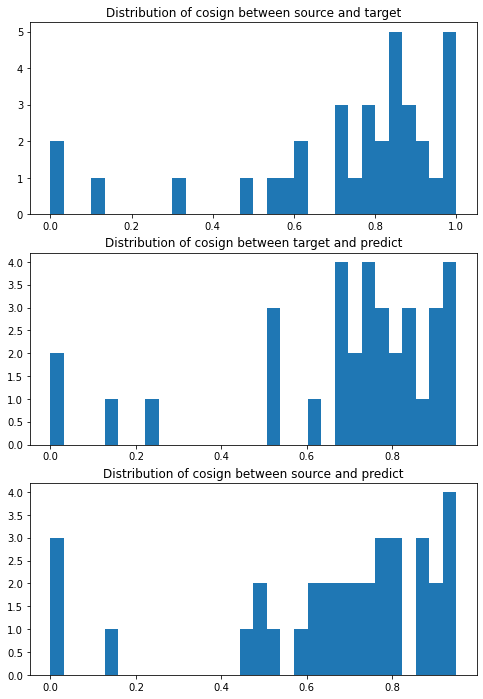

In [24]:
fig, axs = plt.subplots(3, figsize=(8,12))
axs[0].hist(co_st, bins = 30)
axs[0].set_title("Distribution of cosign between source and target")
axs[1].hist(co_tp, bins = 30)
axs[1].set_title("Distribution of cosign between target and predict")
axs[2].hist(co_sp, bins = 30)
axs[2].set_title("Distribution of cosign between source and predict")

#### New Histogram

In [25]:
#Using threshold to cut
def threshold(df, thres):
    new = []
    for d in df:
        if d <= thres:
            new.append(d)
    return new

Text(0.5, 1.0, 'Distribution of cosign between source and predict')

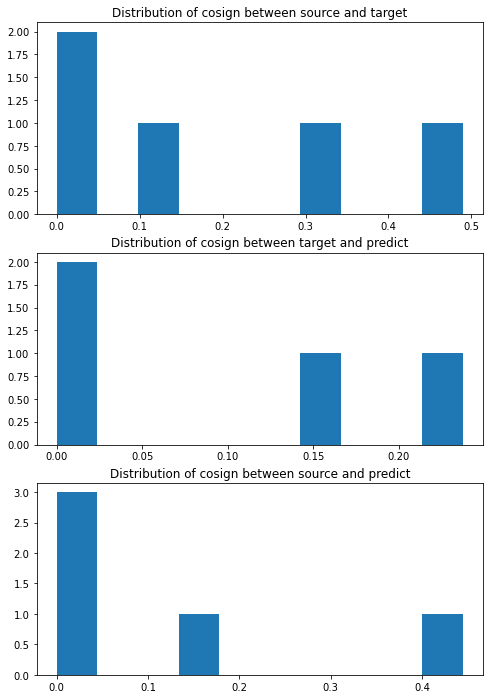

In [26]:
#threshold = 0.5
new_co_st = threshold(co_st, 0.5)
new_co_tp = threshold(co_tp, 0.5)
new_co_sp = threshold(co_sp, 0.5)

#new histogram
fig, axs = plt.subplots(3, figsize=(8,12))
axs[0].hist(new_co_st)
axs[0].set_title("Distribution of cosign between source and target")
axs[1].hist(new_co_tp)
axs[1].set_title("Distribution of cosign between target and predict")
axs[2].hist(new_co_sp)
axs[2].set_title("Distribution of cosign between source and predict")

### Scatter Plot
- between $${WER}_{before},  {WER}_{After}$$ Only those than $${WER}_{After} > {WER}_{before}$$

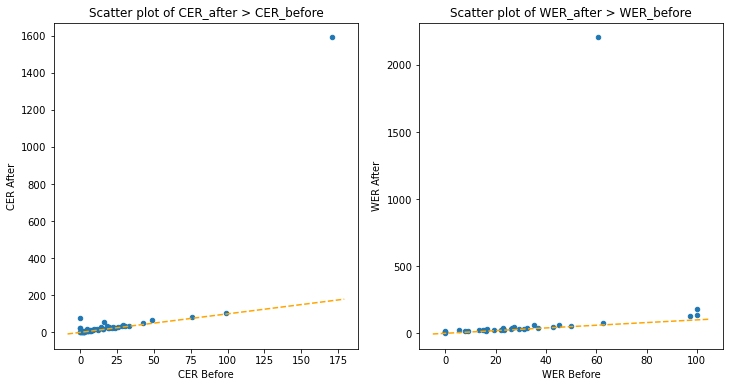

In [27]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
cmore_out.plot(x = 'CER Before', y = 'CER After', kind='scatter',ax=ax[0])
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].set_title("Scatter plot of CER_after > CER_before")
ax[0].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

wmore_out.plot(x = 'WER Before', y = 'WER After', kind='scatter',ax=ax[1])
xlim = ax[1].get_xlim()
ylim = ax[1].get_ylim()
ax[1].set_title("Scatter plot of WER_after > WER_before")
ax[1].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

plt.show()

In [28]:
# what if I delete the corner outlier ...
cmore_out_1 = cmore_out[cmore_out['CER After'] < 1200]
wmore_out_1 = wmore_out[wmore_out['WER After'] < 2000]

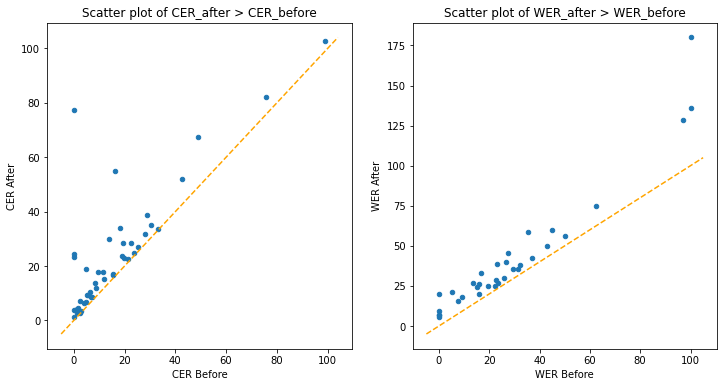

In [29]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
cmore_out_1.plot(x = 'CER Before', y = 'CER After', kind='scatter',ax=ax[0])
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].set_title("Scatter plot of CER_after > CER_before")
ax[0].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

wmore_out_1.plot(x = 'WER Before', y = 'WER After', kind='scatter',ax=ax[1])
xlim = ax[1].get_xlim()
ylim = ax[1].get_ylim()
ax[1].set_title("Scatter plot of WER_after > WER_before")
ax[1].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

plt.show()

11/14
- OCCASIONALLy getting hallucinations, take a look at those that jump uppp
- good to look at CER & WER look like after as the function of function of cosine between orginal and predicted text
- scatter plots 1) doing the cut --> greater after
    --> is possible heatmap!
- whole data set as before 
- Q: when apply model to new daat (no GT) --> can we pick hallucination by picking up before and after
- ideally, if big diiff --> take out from the dataset
- relationship where cosine decreases --> # of hallucination increase

** variable:  CER before, CER after, cosine similarity --> find relationship/relationship
*** improvement per sentnece
--> - then low cosine (corrected incorrectly)

- explore around sentences that have jumps

## Improvement

In [30]:
def get_iqr_by_value(colvalue):
    Q3 = np.quantile(colvalue, 0.75)
    Q1 = np.quantile(colvalue, 0.25)
    IQR = Q3 - Q1
    return IQR

In [31]:
def get_stats(df_byt5_words,col, round_val = 2, print_nans=False):
    colvalue = df_byt5_words[col]
    colvalue = colvalue[~np.isnan(colvalue)]
    # how many nan's
    if print_nans: print('# NaNs =', len(df_byt5_words[col])-len(colvalue))
    med = colvalue.median()
    mea = colvalue.mean()
    std = colvalue.std()
    iqr = get_iqr_by_value(colvalue)
    return round(mea,round_val), round(med,round_val), round(std,round_val), round(iqr,round_val)

In [32]:
def get_improvement_stats(df_byt5_words,col_before, col_after, round_val = 2):
    colvalueb = df_byt5_words[col_before]
    colvalueb = colvalueb[~np.isnan(colvalueb)]
    colvaluea = df_byt5_words[col_after]
    colvaluea = colvaluea[~np.isnan(colvaluea)]
    mask = colvalueb != 0
    colvalue = 100*(1-colvaluea[mask]/colvalueb[mask])
    med = colvalue.median()
    mea = colvalue.mean()
    std = colvalue.std()
    iqr = get_iqr_by_value(colvalue)
    return round(mea,round_val), round(med,round_val), round(std,round_val), round(iqr,round_val)  

In [33]:
before='Before'
after = 'After'
mea_c,med_c,std_c,iqr_c = get_improvement_stats(cmore_out,'CER '+before, 'CER '+after)
print('------------ Improvement ----------------')
print('CER : mean = ', mea_c, ', std =', std_c, ', median =',med_c, ', iqr =', iqr_c)
mea_w,med_w,std_w,iqr_w = get_improvement_stats(wmore_out,'WER '+before, 'WER '+after)
print('WER : mean = ', mea_w, ', std =', std_w, ', median =',med_w, ', iqr =', iqr_w)


------------ Improvement ----------------
CER : mean =  -83.17 , std = 141.76 , median = -33.33 , iqr = 70.08
WER : mean =  -172.87 , std = 646.48 , median = -33.33 , iqr = 48.48


In [34]:
#what if we calculate the improvement again without the corner outlier...
mea_c,med_c,std_c,iqr_c = get_improvement_stats(cmore_out_1,'CER '+before, 'CER '+after)
print('------------ Improvement ----------------')
print('CER : mean = ', mea_c, ', std =', std_c, ', median =',med_c, ', iqr =', iqr_c)
mea_w,med_w,std_w,iqr_w = get_improvement_stats(wmore_out_1,'WER '+before, 'WER '+after)
print('WER : mean = ', mea_w, ', std =', std_w, ', median =',med_w, ', iqr =', iqr_w)

------------ Improvement ----------------
CER : mean =  -64.9 , std = 78.94 , median = -33.33 , iqr = 65.23
WER : mean =  -53.28 , std = 57.34 , median = -32.84 , iqr = 48.86


## Adding cosine to dataframe

In [35]:
wmore_out["cosine_st"] = co_st
wmore_out["cosine_tp"] = co_tp
wmore_out["cosine_sp"] = co_sp

/tmp/ipykernel_906341/3725421611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wmore_out["cosine_st"] = co_st
/tmp/ipykernel_906341/3725421611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wmore_out["cosine_tp"] = co_tp
/tmp/ipykernel_906341/3725421611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [36]:
#checking high cosine see if diff between WER before and after actually small
thres_07 = wmore_out[(wmore_out["cosine_st"] > 0.7) | (wmore_out["cosine_tp"] > 0.7) |(wmore_out["cosine_sp"] > 0.7)]
thres_07.shape[0]

25

In [37]:
thres_07['WER diff'] = thres_07['WER After'] - thres_07['WER Before']
thres_07['WER diff'] 

/tmp/ipykernel_906341/448652005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thres_07['WER diff'] = thres_07['WER After'] - thres_07['WER Before']


7      10.5263
122     6.6667
132     6.6667
138     3.3334
284     9.0909
308     2.7778
324     5.8824
374     3.9216
399     5.8824
408     4.0000
449    13.3334
540     9.0909
548    15.3846
624    16.6666
686     5.8823
708     3.7037
752     9.0909
837    18.1818
841     7.6923
854    13.3333
917     5.7143
927    23.5294
951     5.5556
978    15.7894
988    20.0000
Name: WER diff, dtype: float64

Text(0, 0.5, 'Frequency')

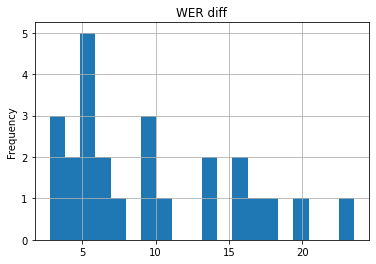

In [38]:
thres_07.hist('WER diff', bins = 20)
plt.ylabel("Frequency")

high cosine
- seeing the improvement with cosine similarity 
--> number is low --> small # where high cosine (try scatter too to see more!)


## Plot improvements vs cosine similarity

In [39]:
df_byt5_words.head(1)

,aligned sentences source,aligned sentences target,sentences source,sentences target,aligned sentences source types,aligned sentences target types,sentences source types,sentences target types,predicted_text,CER Before,WER Before,CER After,WER After,C
0,A histogram of the ^^^^^^^Va^^^ /slope for dw...,A histogram of the $_{\rm max}$ /slope for dw...,A histogram of the Va /slope for dwarf irregu...,A histogram of the $_{\rm max}$ /slope for dw...,W WWWWWWWWW WW WWW ^^^^^^^II^^^ WWWWWW WWW WW...,W WWWWWWWWW WW WWW IIIIIIIIIIII WWWWWW WWW WW...,W WWWWWWWWW WW WWW II WWWWWW WWW WWWWW WWWWWW...,W WWWWWWWWW WW WWW IIIIIIIIIIII WWWWWW WWW WW...,A histogram of the $V_{\rm rot}$ /slope for d...,18.5393,25.0,5.0562,9.375,0


In [40]:
def improve(df, after, before):
    return (1 - df[after]/df[before])*100

In [41]:
#Drop NaN
improve_df = df_byt5_words.dropna()
improve_df.shape

(992, 14)

In [42]:
CER_improve = improve(improve_df, "CER After", "CER Before")
improve_df["CER_improve"] = CER_improve

/tmp/ipykernel_906341/3825601807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improve_df["CER_improve"] = CER_improve


In [43]:
WER_improve = improve(improve_df, "WER After", "WER Before")
improve_df["WER_improve"] = WER_improve

/tmp/ipykernel_906341/2251929948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improve_df["WER_improve"] = WER_improve


In [44]:
# Cosine
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

#for visualization purpose
def create_dataframe(matrix, tokens):

#     doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    doc_names = ['sentence source','predicted_text']
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [45]:
def cosine(df, column1, column2, column1_index, column2_index):
    cosign_w_source_t = []
    for i in range(df.shape[0]):
        try_list = [str(df.iloc[i ,column1_index]), str(df.iloc[i ,column2_index])]
        count_vectorizer = CountVectorizer(min_df = 1, token_pattern=r'[^\s]+')
        vector_matrix = count_vectorizer.fit_transform(try_list)
        tokens = count_vectorizer.get_feature_names()
        cosine_similarity_matrix = cosine_similarity(vector_matrix)
        cosign_w_source_t.append(create_dataframe(cosine_similarity_matrix,[column1,column2]).iloc[0,1])
    return cosign_w_source_t

In [46]:
### Cosine: source and target
co_st = cosine(improve_df, 'sentence source', 'sentences target', 0, 1)
improve_df["co_st"] = co_st
### Cosine: target and predicted
co_tp = cosine(improve_df, 'sentences target', 'predicted_text', 1, 2)
improve_df["co_tp"] = co_tp
### Cosine: source and predicted
co_sp = cosine(improve_df, 'sentence source', 'predicted_text', 0, 2)
improve_df["co_sp"] = co_sp

/home/dw16/.conda/envs/new_env2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/dw16/.conda/envs/new_env2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/dw16/.conda/envs/new_env2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/dw16/.conda/envs/new_env2/lib/python3.9/site-packages/sklearn/utils/deprecation.py

In [47]:
improve_df.head()

,aligned sentences source,aligned sentences target,sentences source,sentences target,aligned sentences source types,aligned sentences target types,sentences source types,sentences target types,predicted_text,CER Before,WER Before,CER After,WER After,C,CER_improve,WER_improve,co_st,co_tp,co_sp
0,A histogram of the ^^^^^^^Va^^^ /slope for dw...,A histogram of the $_{\rm max}$ /slope for dw...,A histogram of the Va /slope for dwarf irregu...,A histogram of the $_{\rm max}$ /slope for dw...,W WWWWWWWWW WW WWW ^^^^^^^II^^^ WWWWWW WWW WW...,W WWWWWWWWW WW WWW IIIIIIIIIIII WWWWWW WWW WW...,W WWWWWWWWW WW WWW II WWWWWW WWW WWWWW WWWWWW...,W WWWWWWWWW WW WWW IIIIIIIIIIII WWWWWW WWW WW...,A histogram of the $V_{\rm rot}$ /slope for d...,18.5393,25.0000,5.0562,9.3750,0,72.727126,62.500000,0.842871,0.842871,0.902439
1,Observations were carried out. using ^^a log ...,Observations were carried out@ using – a log ...,Observations were carried out. using a log of...,Observations were carried out using – a log o...,WWWWWWWWWWWW WWWW WWWWWWW WWWW WWWWW ^^W WWW ...,WWWWWWWWWWWW WWWW WWWWWWW WWW@ WWWWW W W WWW ...,WWWWWWWWWWWW WWWW WWWWWWW WWWW WWWWW W WWW WW...,WWWWWWWWWWWW WWWW WWWWWWW WWW WWWWW W W WWW W...,Observations were carried out using a log of ...,14.7368,17.6471,10.5263,11.7647,0,28.571332,33.333522,0.800327,0.857493,0.882353
2,Compared to a smooth polynomial. the flat fie...,"Compared to a smooth polynomial, the flat fie...",Compared to a smooth polynomial. the flat fie...,"Compared to a smooth polynomial, the flat fie...",WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,"Compared to a smooth polynomial, the flat fie...",2.8436,9.3750,3.3175,3.1250,0,-16.665494,66.666667,0.926829,0.926829,0.975610
3,2006) confirmed. lis scenario.,2006) confirmed this scenario.,2006) confirmed. lis scenario.,2006) confirmed this scenario.,WWWWW WWWWWWWWWW WWW WWWWWWWWW,WWWWW WWWWWWWWW WWWW WWWWWWWWW,WWWWW WWWWWWWWWW WWW WWWWWWWWW,WWWWW WWWWWWWWW WWWW WWWWWWWWW,2006) confirmed this scenario.,9.6774,40.0000,0.0000,0.0000,0,100.000000,100.000000,0.500000,0.500000,1.000000
4,Thus. slieht differences in ihe ^^^©C'a ^^^^v...,"Thus, slight differences in the $\Sigma Ca$ v...",Thus. slieht differences in ihe ©C'a value of...,"Thus, slight differences in the $\Sigma Ca$ v...",WWWWW WWWWWW WWWWWWWWWWW WW WWW ^^^IIIII^^^^W...,WWWWW WWWWWW WWWWWWWWWWW WW WWW IIIIIIIIIII W...,WWWWW WWWWWW WWWWWWWWWWW WW WWW IIIIIWWWWW WW...,WWWWW WWWWWW WWWWWWWWWWW WW WWW IIIIIIIIIII W...,"Thus, slight differences in the $\Omega$ valu...",14.5455,31.5789,13.6364,15.7895,0,6.250043,49.999842,0.684762,0.733674,0.842105


(-100.0, 100.0)

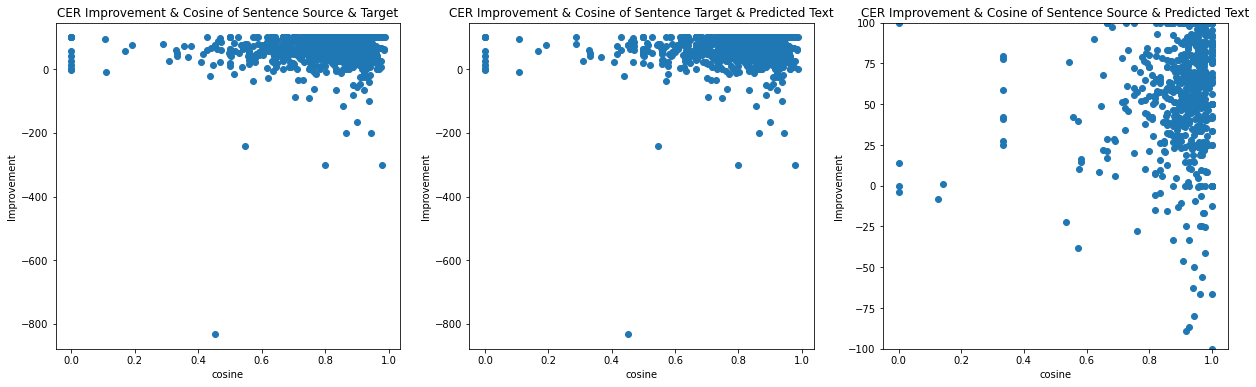

In [48]:
#actual plot
fig, ax = plt.subplots(1,3,figsize=(21,6))
ax[0].scatter(improve_df.co_st, improve_df.CER_improve)
ax[0].set_title("CER Improvement & Cosine of Sentence Source & Target")
ax[0].set_xlabel("cosine")
ax[0].set_ylabel("Improvement")

ax[1].scatter(improve_df.co_tp, improve_df.CER_improve)
ax[1].set_title("CER Improvement & Cosine of Sentence Target & Predicted Text")
ax[1].set_xlabel("cosine")
ax[1].set_ylabel("Improvement")

ax[2].scatter(improve_df.co_sp, improve_df.CER_improve)
ax[2].set_title("CER Improvement & Cosine of Sentence Source & Predicted Text")
ax[2].set_xlabel("cosine")
ax[2].set_ylabel("Improvement")
ax[2].set_ylim(-100, 100)

In [50]:
#finding the length of each sentence
improve_df["source_len"] = improve_df["sentences source"].str.len()
improve_df["target_len"] = improve_df["sentences target"].str.len()
improve_df["predicted_len"] = improve_df["predicted_text"].str.len()

/tmp/ipykernel_906341/3558486218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improve_df["source_len"] = improve_df["sentences source"].str.len()
/tmp/ipykernel_906341/3558486218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improve_df["target_len"] = improve_df["sentences target"].str.len()
/tmp/ipykernel_906341/3558486218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [51]:
improve_df.head()

,aligned sentences source,aligned sentences target,sentences source,sentences target,aligned sentences source types,aligned sentences target types,sentences source types,sentences target types,predicted_text,CER Before,...,WER After,C,CER_improve,WER_improve,co_st,co_tp,co_sp,source_len,target_len,predicted_len
0,A histogram of the ^^^^^^^Va^^^ /slope for dw...,A histogram of the $_{\rm max}$ /slope for dw...,A histogram of the Va /slope for dwarf irregu...,A histogram of the $_{\rm max}$ /slope for dw...,W WWWWWWWWW WW WWW ^^^^^^^II^^^ WWWWWW WWW WW...,W WWWWWWWWW WW WWW IIIIIIIIIIII WWWWWW WWW WW...,W WWWWWWWWW WW WWW II WWWWWW WWW WWWWW WWWWWW...,W WWWWWWWWW WW WWW IIIIIIIIIIII WWWWWW WWW WW...,A histogram of the $V_{\rm rot}$ /slope for d...,18.5393,...,9.3750,0,72.727126,62.500000,0.842871,0.842871,0.902439,152,178,177
1,Observations were carried out. using ^^a log ...,Observations were carried out@ using – a log ...,Observations were carried out. using a log of...,Observations were carried out using – a log o...,WWWWWWWWWWWW WWWW WWWWWWW WWWW WWWWW ^^W WWW ...,WWWWWWWWWWWW WWWW WWWWWWW WWW@ WWWWW W W WWW ...,WWWWWWWWWWWW WWWW WWWWWWW WWWW WWWWW W WWW WW...,WWWWWWWWWWWW WWWW WWWWWWW WWW WWWWW W W WWW W...,Observations were carried out using a log of ...,14.7368,...,11.7647,0,28.571332,33.333522,0.800327,0.857493,0.882353,85,93,95
2,Compared to a smooth polynomial. the flat fie...,"Compared to a smooth polynomial, the flat fie...",Compared to a smooth polynomial. the flat fie...,"Compared to a smooth polynomial, the flat fie...",WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,"Compared to a smooth polynomial, the flat fie...",2.8436,...,3.1250,0,-16.665494,66.666667,0.926829,0.926829,0.975610,210,211,204
3,2006) confirmed. lis scenario.,2006) confirmed this scenario.,2006) confirmed. lis scenario.,2006) confirmed this scenario.,WWWWW WWWWWWWWWW WWW WWWWWWWWW,WWWWW WWWWWWWWW WWWW WWWWWWWWW,WWWWW WWWWWWWWWW WWW WWWWWWWWW,WWWWW WWWWWWWWW WWWW WWWWWWWWW,2006) confirmed this scenario.,9.6774,...,0.0000,0,100.000000,100.000000,0.500000,0.500000,1.000000,31,31,31
4,Thus. slieht differences in ihe ^^^©C'a ^^^^v...,"Thus, slight differences in the $\Sigma Ca$ v...",Thus. slieht differences in ihe ©C'a value of...,"Thus, slight differences in the $\Sigma Ca$ v...",WWWWW WWWWWW WWWWWWWWWWW WW WWW ^^^IIIII^^^^W...,WWWWW WWWWWW WWWWWWWWWWW WW WWW IIIIIIIIIII W...,WWWWW WWWWWW WWWWWWWWWWW WW WWW IIIIIWWWWW WW...,WWWWW WWWWWW WWWWWWWWWWW WW WWW IIIIIIIIIII W...,"Thus, slight differences in the $\Omega$ valu...",14.5455,...,15.7895,0,6.250043,49.999842,0.684762,0.733674,0.842105,101,110,115


Text(0, 0.5, 'Improvement')

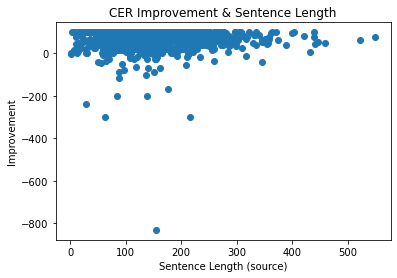

In [52]:
# Plot between improvement and sentence length
# actual plot
plt.scatter(improve_df.source_len, improve_df.CER_improve)
plt.title("CER Improvement & Sentence Length")
plt.xlabel("Sentence Length (source)")
plt.ylabel("Improvement")

Text(0.5, 0, 'Sentence Length')

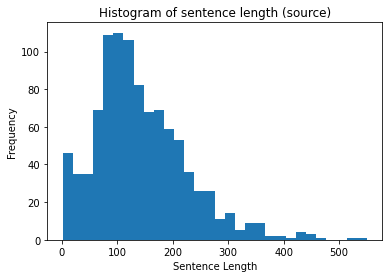

In [53]:
# Histogram of sentence length (source)
plt.hist(improve_df.source_len, bins = 30)
plt.title("Histogram of sentence length (source)")
plt.ylabel("Frequency")
plt.xlabel("Sentence Length")

In [55]:
wmore_out.head()

,sentences source,sentences target,predicted_text,WER Before,WER After,cosine_st,cosine_tp,cosine_sp
7,In thisLetter. I discuss an effectthatusespre...,"In this, I discuss an effectthatusesprecision...","In this, I discuss an effectthatusesprecision...",15.7895,26.3158,0.886405,0.902007,0.791467
10,ust be ultiplied by the factor 2222 which is ...,must be multiplied by the factor $\frac{3}{5}...,must be multiplied by the factor $2\leq 2$ wh...,42.8571,50.0000,0.560449,0.624038,0.505181
103,.,"Possible explanations for this imbalance, dup...",The spectral state of the star is a static en...,100.0000,180.0000,0.000000,0.000000,0.000000
122,Figure 11 shows that there are two stellar ma...,Figure 11 shows that there are two stellar ma...,Figure \ref{fig:mmetallicity} shows that ther...,0.0000,6.6667,1.000000,0.928571,0.928571
128,"Using 655~;Nsu/ It. one has As,=20h.fen> to p...",Using $\theta_{\gamma B}\sim \n\Delta s_p/R_c...,Using $\theta_{\rm obs} \sim \Delta_{\rm sub}...,50.0000,56.2500,0.630126,0.514496,0.612372


In [60]:
thres50 = wmore_out[(wmore_out["cosine_st"] < 0.5) | (wmore_out["cosine_tp"] < 0.5) | (wmore_out["cosine_sp"] < 0.5)]
thres50

,sentences source,sentences target,predicted_text,WER Before,WER After,cosine_st,cosine_tp,cosine_sp
103,.,"Possible explanations for this imbalance, dup...",The spectral state of the star is a static en...,100.0000,180.0000,0.000000,0.000000,0.000000
289,C1 (Appendix ?? inthe online materials)).,\ref{Fig.C1} (Appendix \ref{sec.appendix.figu...,\ref{fig:contours} (Appendix \ref{app:online}...,62.5000,75.0000,0.308607,0.154303,0.500000
406,ypositive waves. thedefinition of Ixruskal-lik...,"7 and 8 we show how the “quasi-spherical"" coo...",The solution of the solution is a similar to ...,97.1429,128.5714,0.109109,0.237566,0.153093
577,"When c, and αἱ. coincide with ws. Awδα .and t...",When $\omega_{c_0}$ and $\omega_c$ coincide w...,When $\omega_{\rm s}$ and $\omega_{\rm s}$ co...,45.0000,60.0000,0.582182,0.509175,0.444649
725,. lere ↳∖↓∪↓⋅∢⋅↓≻↓⋅∢⋅≼∙↓≱∖⋖⋅⇂∙∖⇁⋡∙↙∣⋟↙↓≱∖≼∙∪⊔...,"More precisely, $g^{1/3}T$ is constant, where...",Here $\xi_{\rm p} = \xi_{\rm p} + \xi_{\rm p}...,60.8696,2204.3478,0.489535,0.000675,0.000000
744,samplin,The hollow circles indicate the evenly-sample...,The sample of the sample is stronger than the...,100.0000,135.7143,0.000000,0.525874,0.000000


In [61]:
thres50[["sentences source", "sentences target", "predicted_text"]]

,sentences source,sentences target,predicted_text
103,.,"Possible explanations for this imbalance, dup...",The spectral state of the star is a static en...
289,C1 (Appendix ?? inthe online materials)).,\ref{Fig.C1} (Appendix \ref{sec.appendix.figu...,\ref{fig:contours} (Appendix \ref{app:online}...
406,ypositive waves. thedefinition of Ixruskal-lik...,"7 and 8 we show how the “quasi-spherical"" coo...",The solution of the solution is a similar to ...
577,"When c, and αἱ. coincide with ws. Awδα .and t...",When $\omega_{c_0}$ and $\omega_c$ coincide w...,When $\omega_{\rm s}$ and $\omega_{\rm s}$ co...
725,. lere ↳∖↓∪↓⋅∢⋅↓≻↓⋅∢⋅≼∙↓≱∖⋖⋅⇂∙∖⇁⋡∙↙∣⋟↙↓≱∖≼∙∪⊔...,"More precisely, $g^{1/3}T$ is constant, where...",Here $\xi_{\rm p} = \xi_{\rm p} + \xi_{\rm p}...
744,samplin,The hollow circles indicate the evenly-sample...,The sample of the sample is stronger than the...


- error in alignment routine & OCR scanning (^)
- look at the 2nd sentnece --> look at it
- /projects/RTM/aligned_sentences/batched_sentences (each has 10k)** --> try them out --> 2 columns --> source and target
- graph cosine source and target

In [69]:
neg_improv = improve_df[(improve_df['CER_improve'] < 0) | (improve_df['WER_improve'] < 0)]
neg_improv.head()

,aligned sentences source,aligned sentences target,sentences source,sentences target,aligned sentences source types,aligned sentences target types,sentences source types,sentences target types,predicted_text,CER Before,...,WER After,C,CER_improve,WER_improve,co_st,co_tp,co_sp,source_len,target_len,predicted_len
2,Compared to a smooth polynomial. the flat fie...,"Compared to a smooth polynomial, the flat fie...",Compared to a smooth polynomial. the flat fie...,"Compared to a smooth polynomial, the flat fie...",WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,WWWWWWWW WW W WWWWWW WWWWWWWWWWW WWW WWWW WWW...,"Compared to a smooth polynomial, the flat fie...",2.8436,...,3.1250,0,-16.665494,66.666667,0.926829,0.926829,0.975610,210,211,204
7,In thisLetter. I discuss an effectthatusespre...,"In this,@@@@@@ I discuss an effectthatusespre...",In thisLetter. I discuss an effectthatusespre...,"In this, I discuss an effectthatusesprecision...",WW WWWWWWWWWWW W WWWWWWW WW WWWWWWWWWWWWWWWWW...,WW WWWWW@@@@@@ W WWWWWWW WW WWWWWWWWWWWWWWWWW...,WW WWWWWWWWWWW W WWWWWWW WW WWWWWWWWWWWWWWWWW...,WW WWWWW W WWWWWWW WW WWWWWWWWWWWWWWWWWWWWWWW...,"In this, I discuss an effectthatusesprecision...",6.3830,...,26.3158,1,55.555381,-66.666456,0.886405,0.886405,0.954545,146,141,145
10,^ust be ^ultiplied by the factor ^^^^^^^^^^^^...,must be multiplied by the factor $\frac{3}{5}...,ust be ultiplied by the factor 2222 which is ...,must be multiplied by the factor $\frac{3}{5}...,^WWW WW ^WWWWWWWWW WW WWW WWWWWW ^^^^^^^^^^^^...,WWWW WW WWWWWWWWWW WW WWW WWWWWW IIIIIIIIIIII...,WWW WW WWWWWWWWW WW WWW WWWWWW IIII WWWWW WW ...,WWWW WW WWWWWWWWWW WW WWW WWWWWW IIIIIIIIIIII...,must be multiplied by the factor $2\leq 2$ wh...,45.7447,...,50.0000,1,16.279044,-16.666783,0.560449,0.560449,0.583333,58,94,80
76,More details on the analysis method can be fo...,More details on the analysis method can be fo...,More details on the analysis method can be fo...,More details on the analysis method can be fo...,WWWW WWWWWWW WW WWW WWWWWWWW WWWWWW WWW WW WW...,WWWW WWWWWWW WW WWW WWWWWWWW WWWWWW WWW WW WW...,WWWW WWWWWWW WW WWW WWWWWWWW WWWWWW WWW WW WW...,WWWW WWWWWWW WW WWW WWWWWWWW WWWWWW WWW WW WW...,More details on the analysis method can be fo...,19.4030,...,8.3333,0,-46.153688,0.000000,0.909091,0.909091,0.909091,56,67,81
103,^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...,"Possible explanations for this imbalance, dup...",.,"Possible explanations for this imbalance, dup...",^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...,WWWWWWWW WWWWWWWWWWWW WWW WWWW WWWWWWWWWW WWW...,W,WWWWWWWW WWWWWWWWWWWW WWW WWWW WWWWWWWWWW WWW...,The spectral state of the star is a static en...,99.0566,...,180.0000,1,-3.809539,-80.000000,0.000000,0.000000,0.000000,1,106,147


In [71]:
neg_improv[["sentences source", "sentences target", "predicted_text", 'CER_improve', 'WER_improve']]

,sentences source,sentences target,predicted_text,CER_improve,WER_improve
2,Compared to a smooth polynomial. the flat fie...,"Compared to a smooth polynomial, the flat fie...","Compared to a smooth polynomial, the flat fie...",-16.665494,66.666667
7,In thisLetter. I discuss an effectthatusespre...,"In this, I discuss an effectthatusesprecision...","In this, I discuss an effectthatusesprecision...",55.555381,-66.666456
10,ust be ultiplied by the factor 2222 which is ...,must be multiplied by the factor $\frac{3}{5}...,must be multiplied by the factor $2\leq 2$ wh...,16.279044,-16.666783
76,More details on the analysis method can be fo...,More details on the analysis method can be fo...,More details on the analysis method can be fo...,-46.153688,0.000000
103,.,"Possible explanations for this imbalance, dup...",The spectral state of the star is a static en...,-3.809539,-80.000000
...,...,...,...,...,...
927,6) and (7). one would obtain r;=104*1 kpe and ...,"6) and (7), one would obtain $r_f=104^{+4}_{-4...","6) and (7), one would obtain $r_s \approx 10 h...",15.789629,-66.666667
951,"Upstream of x4, instead of calculating F(x,p)...","Upstream of $\xFP$, instead of calculating $F...","Upstream of $x_1$, instead of calculating $F(...",12.765743,-28.571722
965,The WASP Consortium comprises astronomers pri...,The WASP Consortium comprises astronomers pri...,The WASP Consortium comprises astronomers pri...,-12.501491,85.714465
978,"Summed over all cells, this quantity provides...","Summed over all cells, this quantity provides...","Summed over all cells, this quantity provides...",23.529340,-299.996200
